In [1]:
# Imports

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
folder = "D:\ProgrammingBigFiles\Kaggle\Facial Keypoints Recognition\\"

In [2]:
# Loads database

traindb = pd.read_csv(folder + "training.csv")
testdb = pd.read_csv(folder + "test.csv")
id_lookup_table = pd.read_csv(folder + "IdLookupTable.csv")
sampleSubmission = pd.read_csv(folder + "SampleSubmission.csv")

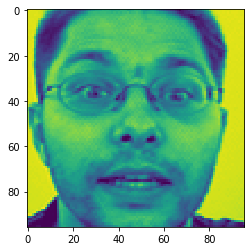

In [3]:
# Preprocessing

traindb = traindb.dropna()

x_train, y_train = traindb.iloc[:, -1], traindb.iloc[:, :-1]
x_test = testdb = testdb.iloc[:, -1]

del traindb
del testdb

x_train = x_train.apply(lambda img: np.fromstring(img, dtype=int, sep=' '))
x_test = x_test.apply(lambda img: np.fromstring(img, dtype=int, sep=' '))

x_train = np.vstack(x_train)
x_test = np.vstack(x_test)
x_train = x_train.reshape(-1, 96, 96, 1) / 255.0
x_test = x_test.reshape(-1, 96, 96, 1) / 255.0
plot.imshow(x_test[0][:, :, 0])

featureIndex = {}
for i in range(len(y_train.columns)):
    featureIndex[y_train.columns[i]] = i

In [8]:
# Very basic model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 16, kernel_size = 2, padding = "same", activation = "relu", input_shape = (96, 96, 1)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(32, (5, 5), activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(64, (5, 5), activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(500, activation = "relu"),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Dense(30)
])
model.summary()
model.compile(optimizer = "adam", loss = "mse", metrics=["mae", "accuracy"])
# ^ rememer to chance loss and accuracy
model.fit(x_train, y_train, epochs = 300)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 96, 16)        80        
_________________________________________________________________
dropout_5 (Dropout)          (None, 96, 96, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 22, 22, 32)       

2140/2140 [==============================] - 3s 1ms/sample - loss: 16.3318 - mean_absolute_error: 3.0804 - acc: 0.6710
Epoch 39/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 15.1448 - mean_absolute_error: 2.9661 - acc: 0.69251s - loss: 15.1084 - mean_abso
Epoch 40/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 14.8422 - mean_absolute_error: 2.9306 - acc: 0.68551s - loss: 14.9598 - mean_absolute_err
Epoch 41/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 17.5568 - mean_absolute_error: 3.1954 - acc: 0.6715
Epoch 42/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 14.5643 - mean_absolute_error: 2.8937 - acc: 0.68080s - loss: 15.0805 - mean_absolute_error
Epoch 43/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 13.6967 - mean_absolute_error: 2.8132 - acc: 0.6916
Epoch 44/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 14.4545 - mean_absolute_error: 2.

2140/2140 [==============================] - 3s 1ms/sample - loss: 12.1027 - mean_absolute_error: 2.6371 - acc: 0.7322
Epoch 96/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 11.9719 - mean_absolute_error: 2.6467 - acc: 0.7238
Epoch 97/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 12.7135 - mean_absolute_error: 2.7127 - acc: 0.7411
Epoch 98/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 12.3901 - mean_absolute_error: 2.6819 - acc: 0.7364
Epoch 99/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 12.6889 - mean_absolute_error: 2.7068 - acc: 0.7500
Epoch 100/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 11.8045 - mean_absolute_error: 2.5962 - acc: 0.7425
Epoch 101/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 12.6257 - mean_absolute_error: 2.6987 - acc: 0.7266
Epoch 102/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 12.876

2140/2140 [==============================] - 3s 1ms/sample - loss: 11.0566 - mean_absolute_error: 2.5432 - acc: 0.7505
Epoch 154/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 10.6545 - mean_absolute_error: 2.4910 - acc: 0.7364
Epoch 155/300
2140/2140 [==============================] - ETA: 0s - loss: 10.9227 - mean_absolute_error: 2.5276 - acc: 0.73 - 3s 1ms/sample - loss: 10.8816 - mean_absolute_error: 2.5226 - acc: 0.7355
Epoch 156/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 11.4908 - mean_absolute_error: 2.5882 - acc: 0.7486
Epoch 157/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 11.0799 - mean_absolute_error: 2.5398 - acc: 0.73642s
Epoch 158/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 10.3934 - mean_absolute_error: 2.4627 - acc: 0.7341
Epoch 159/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 11.3508 - mean_absolute_error: 2.5645 - acc: 0.74021s - loss: 11.

2140/2140 [==============================] - 3s 1ms/sample - loss: 9.6540 - mean_absolute_error: 2.3646 - acc: 0.7477
Epoch 214/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 10.2063 - mean_absolute_error: 2.4164 - acc: 0.7645
Epoch 215/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 10.8469 - mean_absolute_error: 2.5025 - acc: 0.7458
Epoch 216/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 10.8327 - mean_absolute_error: 2.5024 - acc: 0.7500
Epoch 217/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 10.5990 - mean_absolute_error: 2.4837 - acc: 0.7547
Epoch 218/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 10.0158 - mean_absolute_error: 2.4130 - acc: 0.7575
Epoch 219/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 11.1568 - mean_absolute_error: 2.5542 - acc: 0.7477
Epoch 220/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 10.

2140/2140 [==============================] - 3s 1ms/sample - loss: 9.8298 - mean_absolute_error: 2.3842 - acc: 0.7673
Epoch 272/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 10.7564 - mean_absolute_error: 2.4899 - acc: 0.7589
Epoch 273/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 10.2524 - mean_absolute_error: 2.4468 - acc: 0.7621
Epoch 274/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 10.6703 - mean_absolute_error: 2.4890 - acc: 0.7589
Epoch 275/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 10.0997 - mean_absolute_error: 2.4149 - acc: 0.7612
Epoch 276/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 9.7627 - mean_absolute_error: 2.3757 - acc: 0.7547
Epoch 277/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 10.1634 - mean_absolute_error: 2.4360 - acc: 0.7505
Epoch 278/300
2140/2140 [==============================] - 3s 1ms/sample - loss: 10.2

In [52]:
y_predict = model.predict(x_test)
ans = []
for line in id_lookup_table.iterrows():
    ans += [y_predict[line[1]["ImageId"] - 1, featureIndex[line[1]["FeatureName"]]]]
submission = pd.DataFrame({"RowId": list(range(1, len(id_lookup_table) + 1)), "Location": ans})
submission.to_csv("submission.csv", index = False)

NameError: name 'DataFrame' is not defined

In [ ]:
model.save_weights()